In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('testtable.csv')
data

,Name,%pts won-serve,%pts won-receive,%pts won-shortrally,%pts won-longrally,%pts won-FH,%pts won-BH,rank,won
0,Zhendong Fan,0.600,0.400,0.244,0.756,0.511,0.489,1,1
1,Ovtcharov Dimitrij,0.666,0.334,0.194,0.806,0.171,0.829,12,0
2,Long Ma,0.522,0.478,0.295,0.705,0.720,0.280,3,1
3,Boll Timo,0.558,0.442,0.205,0.795,0.617,0.383,10,0
4,Long Ma,0.561,0.439,0.157,0.843,0.578,0.422,3,1
...,...,...,...,...,...,...,...,...,...
353,BERTRAND IRVIN,0.552,0.448,0.421,0.579,0.702,0.298,368,0
354,KARLSSON KRISTIAN,0.555,0.445,0.361,0.639,0.638,0.362,28,0
355,IONESCU OVIDIU,0.525,0.475,0.275,0.725,0.615,0.385,55,1
356,BOLL TIMO,0.512,0.488,0.179,0.821,0.666,0.334,10,1


In [28]:
df = data.rename(columns={'%pts won-serve': 'SP', '%pts won-receive':'RP', '%pts won-shortrally':'SRP','%pts won-longrally':'LRP', '%pts won-FH':'FHP', '%pts won-BH': 'BHP', 'rank':'RANK'})

In [29]:
rank = list(df['RANK'])
won = list(df['won'])
rankdiff=[]

for i in range(0, len(rank), 2):
    diff = rank[i]-rank[i+1]
    if rank[i] > 100 and rank[i+1] > 100:
        rankdiff.append(0)
        rankdiff.append(0)
    else:
        rankdiff.append(diff)
        rankdiff.append(diff*-1)
df['RANKDIFF'] = rankdiff

In [30]:
df

,Name,SP,RP,SRP,LRP,FHP,BHP,RANK,won,RANKDIFF
0,Zhendong Fan,0.600,0.400,0.244,0.756,0.511,0.489,1,1,-11
1,Ovtcharov Dimitrij,0.666,0.334,0.194,0.806,0.171,0.829,12,0,11
2,Long Ma,0.522,0.478,0.295,0.705,0.720,0.280,3,1,-7
3,Boll Timo,0.558,0.442,0.205,0.795,0.617,0.383,10,0,7
4,Long Ma,0.561,0.439,0.157,0.843,0.578,0.422,3,1,2
...,...,...,...,...,...,...,...,...,...,...
353,BERTRAND IRVIN,0.552,0.448,0.421,0.579,0.702,0.298,368,0,358
354,KARLSSON KRISTIAN,0.555,0.445,0.361,0.639,0.638,0.362,28,0,-27
355,IONESCU OVIDIU,0.525,0.475,0.275,0.725,0.615,0.385,55,1,27
356,BOLL TIMO,0.512,0.488,0.179,0.821,0.666,0.334,10,1,-132


In [31]:
result = df['won']
df = df.drop(columns=['won'])

In [37]:
sa, sra, fha = [],[],[]
for i in range(len(df.index)):
    sa.append(df['SP'][i]-df['RP'][i])
    sra.append(df['SRP'][i]-df['LRP'][i])
    fha.append(df['FHP'][i]-df['BHP'][i])
df['SA'] = sa
df['SRA'] = sra
df['FHA'] = fha

In [41]:
from statistics import mean
balance = []
for i in range(len(df.index)):
    balance.append(mean([abs(sa[i]), abs(sra[i]), abs(fha[i])]))
df['BALANCE'] = balance

In [44]:
df['WON'] = won

In [45]:
df

,Name,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,Zhendong Fan,0.600,0.400,0.244,0.756,0.511,0.489,1,-11,0.200,-0.512,0.022,0.244667,1
1,Ovtcharov Dimitrij,0.666,0.334,0.194,0.806,0.171,0.829,12,11,0.332,-0.612,-0.658,0.534000,0
2,Long Ma,0.522,0.478,0.295,0.705,0.720,0.280,3,-7,0.044,-0.410,0.440,0.298000,1
3,Boll Timo,0.558,0.442,0.205,0.795,0.617,0.383,10,7,0.116,-0.590,0.234,0.313333,0
4,Long Ma,0.561,0.439,0.157,0.843,0.578,0.422,3,2,0.122,-0.686,0.156,0.321333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,BERTRAND IRVIN,0.552,0.448,0.421,0.579,0.702,0.298,368,358,0.104,-0.158,0.404,0.222000,0
354,KARLSSON KRISTIAN,0.555,0.445,0.361,0.639,0.638,0.362,28,-27,0.110,-0.278,0.276,0.221333,0
355,IONESCU OVIDIU,0.525,0.475,0.275,0.725,0.615,0.385,55,27,0.050,-0.450,0.230,0.243333,1
356,BOLL TIMO,0.512,0.488,0.179,0.821,0.666,0.334,10,-132,0.024,-0.642,0.332,0.332667,1


<AxesSubplot:xlabel='FHA', ylabel='WON'>

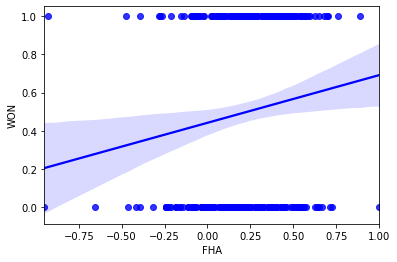

In [52]:
sns.regplot(x='FHA', y='WON', data=df, color='blue')

In [53]:
df.to_csv('features.csv', index=False)